In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred
import matplotlib.dates as mdates

## 1. Get data with Fred api

In [3]:
fred_api_key = '851e9f74d81d8383b78883952fea5d56'

#### Create The Fred object

In [4]:
fred = Fred(api_key=fred_api_key)

#### Search for GDP Data

In [5]:
gdp_search = fred.search('GDP')

In [6]:
gdp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
GFDEGDQ188S,GFDEGDQ188S,2023-11-22,2023-11-22,Federal Debt: Total Public Debt as Percent of ...,1966-01-01,2023-04-01,Quarterly,Q,Percent of GDP,% of GDP,Seasonally Adjusted,SA,2023-09-28 08:03:01-05:00,84,Federal Debt: Total Public Debt as Percent of ...
FYFSGDA188S,FYFSGDA188S,2023-11-22,2023-11-22,Federal Surplus or Deficit [-] as Percent of G...,1929-01-01,2022-01-01,Annual,A,Percent of GDP,% of GDP,Not Seasonally Adjusted,NSA,2023-10-24 13:44:01-05:00,74,Federal Surplus or Deficit [-] as Percent of G...
FYFSDFYGDP,FYFSDFYGDP,2023-11-22,2023-11-22,Federal Surplus or Deficit [-] as Percent of G...,1930-06-30,2022-09-30,"Annual, Fiscal Year",A,Percent of GDP,% of GDP,Not Seasonally Adjusted,NSA,2023-10-24 13:44:04-05:00,42,None
GDP,GDP,2023-11-22,2023-11-22,Gross Domestic Product,1947-01-01,2023-07-01,Quarterly,Q,Billions of Dollars,Bil. of $,Seasonally Adjusted Annual Rate,SAAR,2023-10-26 07:55:01-05:00,92,BEA Account Code: A191RC Gross domestic produ...
FYONGDA188S,FYONGDA188S,2023-11-22,2023-11-22,Federal Net Outlays as Percent of Gross Domest...,1929-01-01,2022-01-01,Annual,A,Percent of GDP,% of GDP,Not Seasonally Adjusted,NSA,2023-10-24 13:44:03-05:00,65,Federal Net Outlays as Percent of Gross Domest...


In [7]:
# Find the api id with units of measurement is 'Billions of Dollars' and frequency in year is 'Annual'
gdp_id = gdp_search[(gdp_search['units'] == 'Billions of Dollars') & (gdp_search['frequency'] == 'Annual')]
gdp_id.head() # You can choose any id you want, here I choose GDPA

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
GDPA,GDPA,2023-11-22,2023-11-22,Gross Domestic Product,1929-01-01,2022-01-01,Annual,A,Billions of Dollars,Bil. of $,Not Seasonally Adjusted,NSA,2023-09-28 07:51:03-05:00,60,BEA Account Code: A191RC
PCECA,PCECA,2023-11-22,2023-11-22,Personal Consumption Expenditures,1929-01-01,2022-01-01,Annual,A,Billions of Dollars,Bil. of $,Not Seasonally Adjusted,NSA,2023-09-28 07:50:03-05:00,39,BEA Account Code: DPCERC
A071RC1A027NBEA,A071RC1A027NBEA,2023-11-22,2023-11-22,Personal saving,1929-01-01,2022-01-01,Annual,A,Billions of Dollars,Bil. of $,Not Seasonally Adjusted,NSA,2023-09-28 07:51:07-05:00,41,BEA Account Code: A071RC For more information...
W006RC1A027NBEA,W006RC1A027NBEA,2023-11-22,2023-11-22,Federal government current tax receipts,1929-01-01,2022-01-01,Annual,A,Billions of Dollars,Bil. of $,Not Seasonally Adjusted,NSA,2023-09-28 07:50:08-05:00,12,BEA Account Code: W006RC For more information...
A067RC1A027NBEA,A067RC1A027NBEA,2023-11-22,2023-11-22,Disposable personal income,1929-01-01,2022-01-01,Annual,A,Billions of Dollars,Bil. of $,Not Seasonally Adjusted,NSA,2023-09-28 07:51:16-05:00,14,BEA Account Code: A067RC For more information...


In [8]:
# Get data from selected api id 'GDPA' (US GDP in 2013-2022)
gdp = fred.get_series(series_id='GDPA', observation_start='2013-01-01', observation_end='2022-01-01')
gdp_df = gdp.to_frame(name='GDP (Bil$)') # Create DataFrame

## 2. Exploratory Data Analysis (EDA)

In [9]:
gdp_df.shape

(10, 1)

In [10]:
gdp_df.describe()

,GDP (Bil$)
count,10.000000
mean,20403.985500
std,2763.099021
min,16880.683000
25%,18422.492500
50%,20134.309000
75%,21471.783750
max,25744.108000


In [11]:
gdp_df.isnull().sum() #checking for total null values

GDP (Bil$)    0
dtype: int64

## 3. Data preprocessing

#### Calculate the absolute change in GDP

In [13]:
gdp_df['Absolute change (Bil$)'] = gdp_df['GDP (Bil$)'] - gdp_df['GDP (Bil$)'].shift()

#### Calculate the consecutive growth rate in GDP

In [14]:
gdp_df['Consecutive GRate (%)'] = (gdp_df['GDP (Bil$)'] / gdp_df['GDP (Bil$)'].shift())*100

#### Calculate the growth rate in GDP

In [15]:
gdp_df['Growth rate (%)'] = (gdp_df['Absolute change (Bil$)'] / gdp_df['GDP (Bil$)'].shift())*100

#### Calculate the value of 1% consecutive GDP growth

In [16]:
gdp_df['1% growth rate (Bil$)'] = gdp_df['GDP (Bil$)'].shift()/100

In [17]:
gdp_df

,GDP (Bil$),Absolute change (Bil$),Consecutive GRate (%),Growth rate (%),1% growth rate (Bil$)
2013-01-01,16880.683,NaN,NaN,NaN,NaN
2014-01-01,17608.138,727.455,104.309393,4.309393,168.80683
2015-01-01,18295.019,686.881,103.900929,3.900929,176.08138
2016-01-01,18804.913,509.894,102.787065,2.787065,182.95019
2017-01-01,19612.102,807.189,104.292437,4.292437,188.04913
2018-01-01,20656.516,1044.414,105.325355,5.325355,196.12102
2019-01-01,21521.395,864.879,104.186955,4.186955,206.56516
2020-01-01,21322.950,-198.445,99.077918,-0.922082,215.21395
2021-01-01,23594.031,2271.081,110.650876,10.650876,213.22950
2022-01-01,25744.108,2150.077,109.112801,9.112801,235.94031


## 4. Analysis

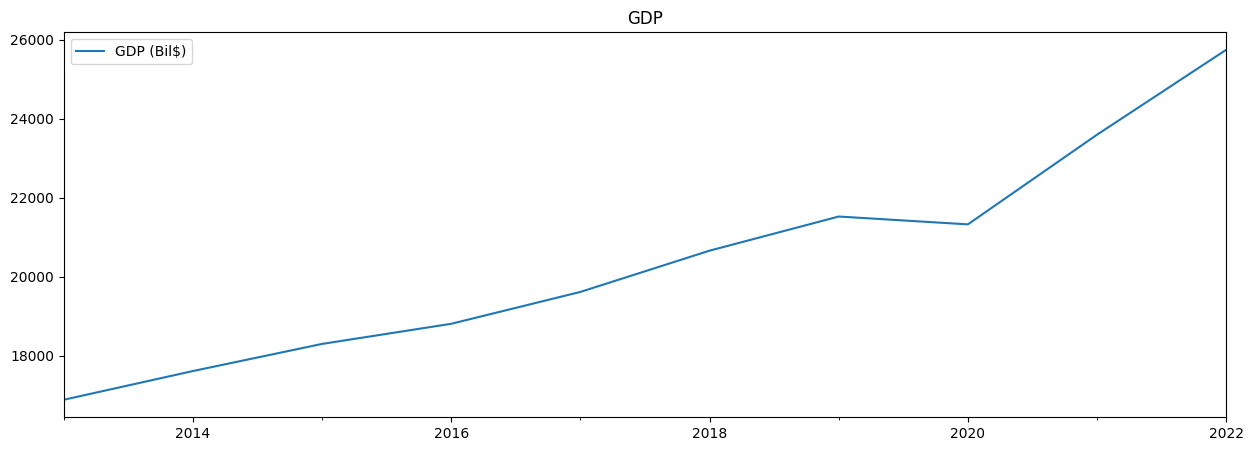

In [12]:
# Plot GDP
gdp_df.plot(figsize=(15,5))

plt.legend(loc='best')
plt.title('GDP')
plt.show()

#### Defining subplots for 4 indicators in the dataset

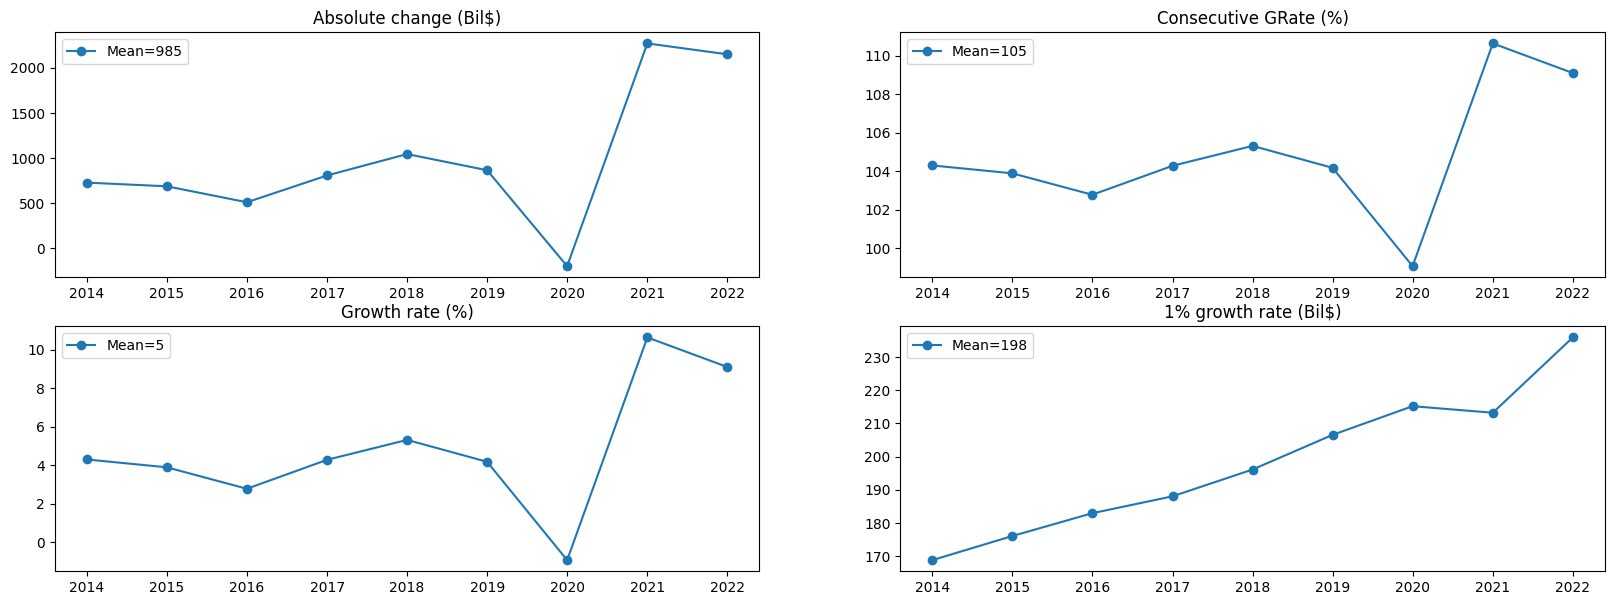

In [18]:
fig = plt.figure(figsize=(20, 7))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(gdp_df['Absolute change (Bil$)'], "o-", label='Mean=%s'%(round(gdp_df['Absolute change (Bil$)'].mean())))
ax1.set_title('Absolute change (Bil$)')
ax1.legend(loc="best")

ax2.plot(gdp_df['Consecutive GRate (%)'], "o-", label='Mean=%s'%(round(gdp_df['Consecutive GRate (%)'].mean())))
ax2.set_title('Consecutive GRate (%)')
ax2.legend(loc="best")

ax3.plot(gdp_df['Growth rate (%)'], "o-", label='Mean=%s'%(round(gdp_df['Growth rate (%)'].mean())))
ax3.set_title('Growth rate (%)')
ax3.legend(loc="best")

ax4.plot(gdp_df['1% growth rate (Bil$)'], "o-", label='Mean=%s'%(round(gdp_df['1% growth rate (Bil$)'].mean())))
ax4.set_title('1% growth rate (Bil$)')
ax4.legend(loc="best")

- Based on the chart, US GDP in the period 2013-2022 continues to grow over the years with an average growth rate of 5%, corresponding to an average absolute GDP increase of 985 billion dollars, absolute value 1 % GDP increase in the period 2013-2022 increased continuously, in 2014 it was 168.8 billion dollars and in 2022 it was 235.94 billion dollars. GDP growth in the period 2012-2022 is generally very positive, reflecting the US economy very well.

- To further analyze the change in US GDP over the years, we divide the period 2013-2022 into two periods 2013-2019 and 2020-2022: 
    + In the period 2013-2019, the GDP growth rate tended to decrease from 4.3% in 2014 to 2.78% in 2016, then increased to 5.32% in 2018 and decreased to 4.18% in 2019. The sharp drop in world crude oil prices and political instability in 2016 and tightening monetary policy in 2019 are the reasons why GDP growth rate decreased compared to previous years.
    + In the period 2020-2022, Covid-19 has negatively affected the US economy, causing GDP to decrease to 21,322 billion dollars compared to 21,521 billion dollars in 2019, the GDP growth rate reached a negative level of -0.92% . After a difficult year, by 2021 the US Government has issued fiscal policies and loose monetary policies to stimulate the economy to recover after the epidemic, so GDP has increased to 23,594 billion dollars, at an accelerated rate. GDP growth reached 10.65%. In 2022, the GDP growth rate will decrease to 9.11% because of rising inflation and being indirectly affected by the Russia-Ukraine war.

=> US GDP has grown steadily in the period 2013-2022, which is a good sign, although it is more or less affected by a number of other factors.

## 5. Build ARIMA model and forecast